# Membrane Permeability Tutorial (Analysis)

In this tutorial, we will demonstrate how to extract the full trajectory of a crossing event and calculate the incoming flux to the target state from the WE membrane permeation simulation. __Note that this tutorial assumes that you already have a finished simulation using the HDF5 framework with at least one crossing event.__

## Extract the trajectory of a crossing event

We will use the analysis module of WESTPA to extract the trajectory of the most probable pathway from our simulation. First, we make necessary imports and construct a `Run` object on `west.h5`:

In [1]:
from westpa.analysis import Run, HDF5MDTrajectory

run = Run.open('west.h5')
run.summary

,n_particles,min_bin_prob,max_bin_prob,min_seg_prob,max_seg_prob,cputime,walltime
1,5,1.0,1.0,0.2,0.2,1301.553127,465.256439
2,15,0.2,0.4,0.04,0.133333,4293.063974,1466.927154
3,35,0.066667,0.2,0.013333,0.066667,10022.91254,3147.62858
4,55,0.013333,0.191111,0.002667,0.044444,15945.511953,5040.211619
5,60,0.002667,0.16,0.000533,0.044444,17498.235068,5384.734828
6,65,0.0024,0.21,0.000444,0.061111,18704.76975,5838.108513
7,65,0.008333,0.194444,0.00125,0.048889,18756.767901,5882.41901
8,70,0.001667,0.166667,0.000333,0.045741,20437.191859,6297.919408
9,80,0.000333,0.145454,0.000067,0.045741,22743.721471,7143.796719
10,85,0.000067,0.161914,0.000013,0.045741,24695.949969,7669.588866


Then, we identify the recycled walker, i.e., walkers that reached the target state, that has the highest probability as follows,

In [3]:
walker = max(run.recycled_walkers, key=lambda walker: walker.weight)

The full history (trace) of this recycled walker can be accessed by a single call to the `trace` method of the `Walker` object:

In [4]:
trace = walker.trace()

The `Trace` object is essentially a sequence of segments that the walker took to go from the basis state to the target state. We can obtain information about the walker, such as progress coordinates and the trajectory, from the `Trace` object. For example, the progress coordinates of the trace can be extracted and plotted as follows:

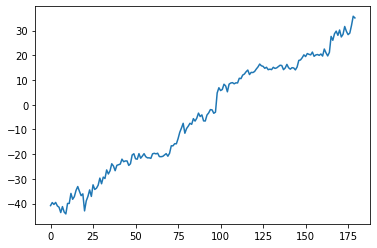

In [9]:
import numpy as np
import matplotlib.pyplot as plt

pcoords = []
for walker in trace:
    pcoords.append(walker.pcoords)
pcoords = np.concatenate(pcoords)

plt.plot(pcoords)

The trajectory of the trace can be extracted and saved in any format supported by `mdtraj`. Here, we save it in the [MDTraj HDF5 format](https://mdtraj.org/1.9.5/hdf5_format.html):

In [ ]:
trajectory = HDF5MDTrajectory()
traj = trajectory(trace)

In case the trajectory is too large, there are several ways to slim it down:

In [ ]:
traj = traj.atom_slice(traj.top.select('not water'))  # remove water
traj = traj[::5]   # takes every 5 frames (we have 5 frames per iteration for this tutorial)

In [ ]:
traj_file = 'trace-%d-%d.h5'%(walker.iteration.number, walker.index)
traj.save(traj_file)

It is a good practice to call `Run.close()` when the `Run` object is not needed any more to close and release the handle of `west.h5`.

In [18]:
run.close()

There are other alternatives, but here we choose to use [NGL Viewer](https://nglviewer.org/) to visualize the trajectory thanks to its capability of visualizing trajectories in the HDF5 format. First, we load up the trajectory using `mdtraj` and then create a `view` of the trajectory object using `nglview`:

In [14]:
import nglview as nv
import mdtraj as md

traj = md.load(traj_file)
top = traj.topology
view = nv.show_mdtraj(traj)

Then we can visualize the trajectory of the crossing event using the following code. Note that you can modify and apply your own styles for visualizing the molecules, e.g., the permeant, the lipids, or the waters.

In [15]:
view.clear()

view.add_line(selection=top.select("resname 'POP'"), color="skyblue")
view.add_ball_and_stick(selection=top.select("resname 'LIG'"), color="red")
# uncomment this line to show waters
view.add_line(selection=top.select("resname 'HOH'"), color="lightgrey")

view

NGLWidget(max_frame=36)

## Calculate the fluxes into the target state

We run `w_ipa` to calculate the evolution of the fluxes into the target state as the iteration number increases. The analysis scheme for running `w_ipa` is configured in `west.cfg`. For example, the following is configured for this tutorial:
```
west:
  analysis:
     directory: ANALYSIS                # specify the directory all analysis files should exist in.
     kinetics:                          # general options for both kinetics routines.
       step_iter: 1 
       evolution: cumulative
       extra: [ 'disable-correl' ]
     analysis_schemes:                  # Analysis schemes.  Required: name (PERMEATION), states, and bins
       PERMEATION:
         enabled: True
         bins:
           - type: RectilinearBinMapper
             boundaries: 
               - [-inf,-25.0,25.0,inf]  # -25.0 to -inf for the starting state and 25.0 to inf for the target state
         states:
           - label: uncrossed
             coords: 
               - [-26.0]
           - label: crossed
             coords: 
               - [26.0]  

```

Then simply call the following command to run `w_ipa`:

In [1]:
!w_ipa -ao


Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.

Complete!
Setting iteration to iter 37.
Your current scheme, system and iteration are : PERMEATION, /Users/shezhang/GitRepos/westpa_tutorials/membrane_permeability, 37



The flux data will be saved to `ANALYSIS/PERMEATION/direct.h5`. We will use `h5py` to access the flux data:

In [23]:
import h5py

h5f = h5py.File('ANALYSIS/PERMEATION/direct.h5', 'r')
flux_dataset = h5f['target_flux_evolution'][:, 1]  # 1 for fluxes into the crossed state as specified in west.cfg
flux_dataset

array([(1,  2, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1,  3, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1,  4, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1,  5, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1,  6, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1,  7, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1,  8, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1,  9, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1, 10, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1, 11, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1, 12, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
       (1, 13, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0),
    

The dataset contains 5 columns and their headers are shown in `dtype`. The first two columns indicate the range of the iterations that the fluxes were used to be bootstrapped from to calculate the mean (`expected`), 95% confidence intervals (`ci_lbound` and `ci_ubound`), and standard deviation (`sterr`).

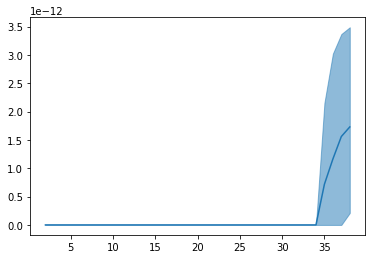

In [20]:
import matplotlib.pyplot as plt

flux_avg = flux_dataset['expected']
flux_lb  = flux_dataset['ci_lbound']
flux_ub  = flux_dataset['ci_ubound']
iters    = flux_dataset['iter_stop']

plt.plot(iters, flux_avg, color='C0')
plt.fill_between(iters, flux_lb, flux_ub, color='C0', alpha=0.5)

Note that the state labels can be double checked by:

In [10]:
h5f['state_labels'][:]

array([b'uncrossed', b'crossed'], dtype='|S9')

Again, close the HDF5 object to release the file handle:

In [21]:
h5f.close()